In [2]:
#Render plots in notebook environment
%matplotlib inline

#Import the dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
import seaborn as sns

#Load in CSV file
mock_data_df = pd.read_csv("mock_data.csv")
mock_data_df


,UMI,Sender Level2,Sender Level2 Name,Sender Level1,Sender Level1 Name,Sender,Sender Name,Sender Ext Code,Sender GLID City,Sender Audit Date,...,Sender Account Executive,Mvmt Receiver Name,Mvmt Receiver Address,Mvmt Receiver City,Mvmt Receiver Region,Mvmt Receiver Zipcode,DOD,Unk_DON,Qty,Age Bucket
0,2034067010623,4000541514,Procter & Deal,4000437750,"Mills, Aguilar and Poole",4000996302,Hall-Torres,62254933972,Connerchester,9/9/2023,...,-,Williams-Smith,108 Kimberly Knolls Apt. 775,Lauramouth,Arizona,2131,10/19/2023,7/4/2023,30,40-50
1,2034626095638,4000255818,Folders,4000430948,Dudley Ltd,4000769438,Fleming LLC,18391983869,Davishaven,1/29/2023,...,-,"Chan, Kerr and Crawford",5786 Rebecca Plaza Apt. 647,Ramirezborough,Iowa,813,6/29/2023,2/18/2023,10,40-50
2,2039964186187,4000526048,Hershe,4000752317,"King, Butler and Mcintosh",4000862944,Williams LLC,26206657067,North Joseph,1/12/2023,...,-,"Pacheco, Wise and Nelson",18294 Vega Manors Apt. 495,West Kimberly,Illinois,98376,4/11/2023,6/28/2023,23,30-40
3,2031421336536,4000932141,Folders,4000598796,"Smith, Myers and Young",4000117136,Evans Ltd,11216534520,New Katherine,7/26/2023,...,-,Cain Ltd,6071 Nicholas Pines Suite 501,Nathanhaven,Georgia,83310,3/6/2023,9/3/2023,6,90-100
4,2035699319433,4000961513,Campbull,4000410157,"Griffith, Clark and Whitney",4000322290,"Norton, Jones and Copeland",79453207054,West Patricia,5/12/2023,...,-,"Hendrix, Hood and Martin",614 Sanchez Pike,Troyville,South Carolina,31253,2/19/2023,6/8/2023,30,90-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2030597322769,4000853714,Del Marte,4000722917,Warren and Sons,4000616346,Perez LLC,7069895245,North Stephentown,5/20/2023,...,-,"Martinez, Hess and Butler",95173 Clark Glen Apt. 090,Gabrieltown,South Carolina,35434,1/12/2023,3/26/2023,7,70-80
99996,2039638573580,4000429400,Betty Socker,4000742302,Martinez-Parker,4000598929,"Anderson, Romero and Jones",65400584026,Ramosport,6/18/2023,...,-,Hoffman and Sons,865 Megan Creek Suite 253,South Valerie,Texas,75206,10/2/2023,10/6/2023,35,90-100
99997,2037054988141,4000167612,General Malls,4000356973,Wise-Zamora,4000392129,Henry and Sons,18035672980,Stephenburgh,9/22/2023,...,-,"Murray, Barnett and Carter",9026 Christina Parkways,West Jeremychester,New York,97886,4/7/2023,2/4/2023,28,80-90
99998,2037292724293,4000204510,Walsmart,4000372204,Collier-Yates,4000326065,"Good, Lynn and Butler",59339991420,Lake Sarah,1/1/2023,...,-,Stark Inc,10420 Jessica Mews Apt. 470,East Marcusport,Illinois,52723,5/17/2023,5/13/2023,21,50-60


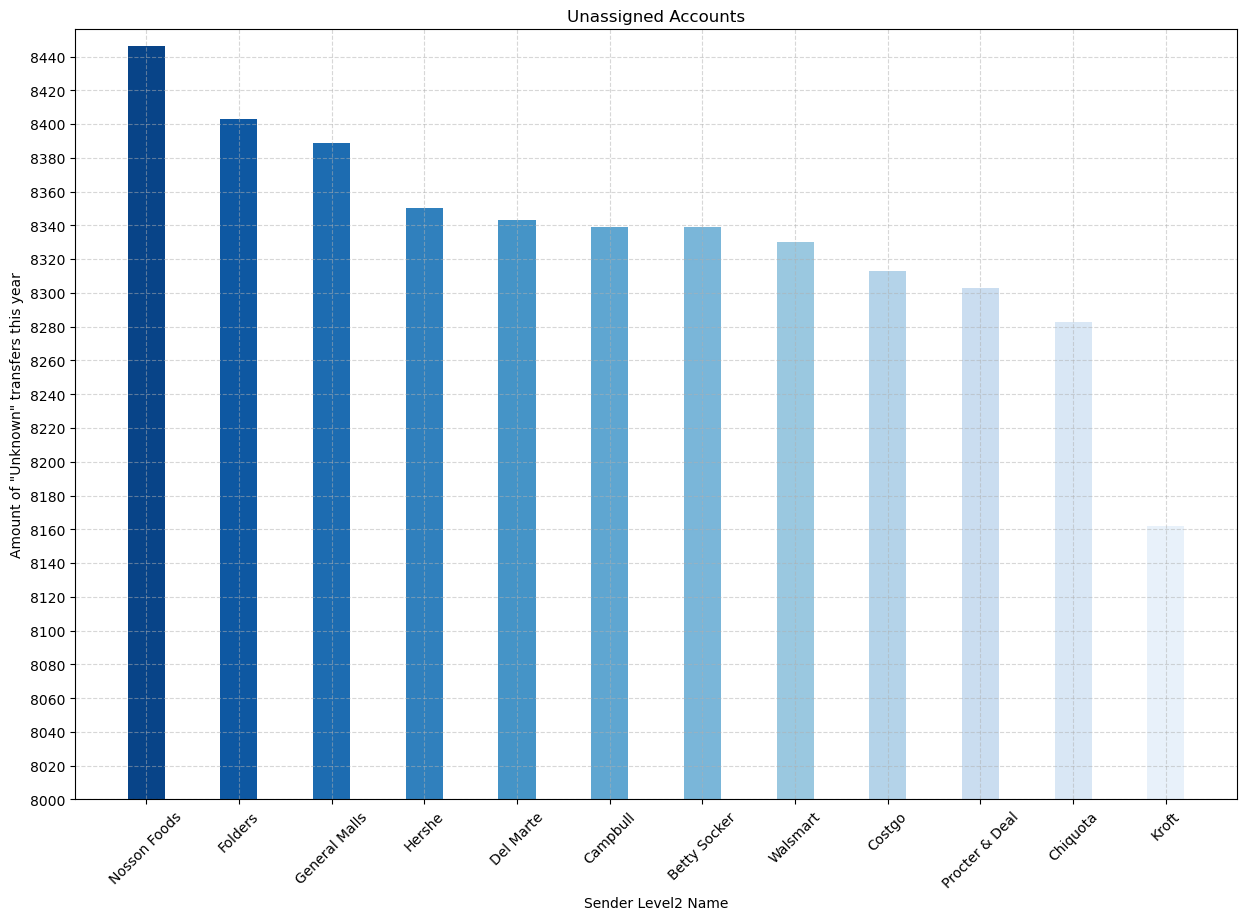

In [18]:
column_name = 'Sender Level2 Name'
value_counts = mock_data_df[column_name].value_counts()

# Create a gradient color palette
num_bars = len(value_counts)
color_palette = sns.color_palette("Blues_r", n_colors=num_bars)

# Bar graph bar width
bar_width = .4

# Creating bar chart showing the amount of times an unassigned account appears on the "Unknowns" list due to a stuck transfer
plt.figure(figsize=(15,10)) # Sizing my graph


# Setting up the lower and upper limits of the y-axis
y_start = 8000  
y_end = value_counts.max() + 10 
plt.ylim(y_start, y_end)

# Creating y-axis ticks
y_ticks = np.arange(y_start, y_end + 1, 20)  # Adjust the interval as needed
plt.yticks(y_ticks)

plt.bar(value_counts.index, value_counts.values, width=bar_width, color=color_palette)
plt.xlabel(column_name)
plt.ylabel('Amount of "Unknown" transfers this year')
plt.title(f'Unassigned Accounts') 
plt.xticks(rotation=45)  

# Customize grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Show the bar chart
plt.show()

In [4]:
# Finding the total amount of pallets transfered

# Group by company and sum the quantities
grouped = mock_data_df.groupby('Sender Level2 Name')['Qty'].sum().reset_index()

# Creating a new DataFrame with company names and total quantities
total_quantities_df = pd.DataFrame({
    'Company': grouped['Sender Level2 Name'],
    'Total Quantity': grouped['Qty']
})

# Sorting 'Total Quantity' column in descending order
total_quantities_df = total_quantities_df.sort_values(by='Total Quantity', ascending=False)

# Saving the new DF as a CSV
total_quantities_df.to_csv('total_quantities.csv', index=False)

# Display the DataFrame
print(total_quantities_df)

           Company  Total Quantity
5          Folders          173583
4        Del Marte          172705
9     Nosson Foods          172702
11        Walsmart          171522
6    General Malls          171254
0     Betty Socker          170753
1         Campbull          170188
10  Procter & Deal          170050
7           Hershe          169990
2         Chiquota          169852
3           Costgo          169643
8            Kroft          167303


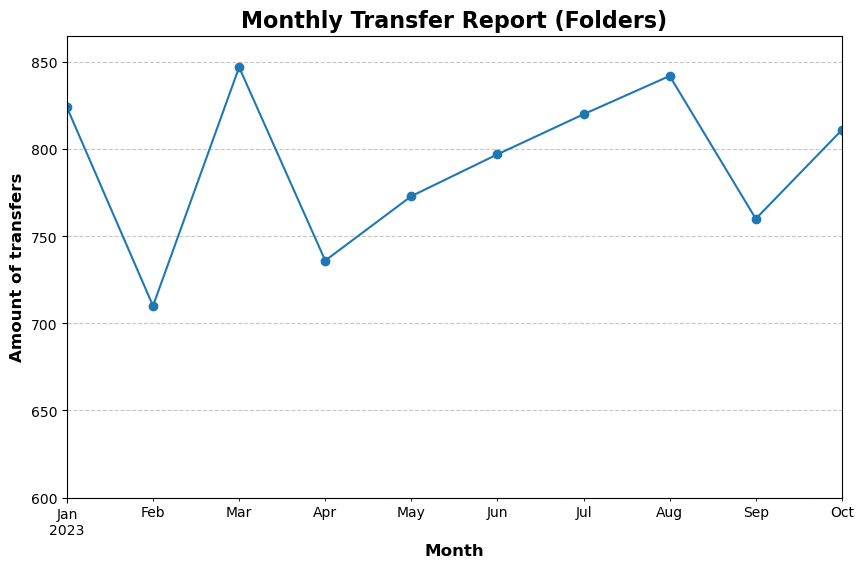

In [16]:
folders_df = mock_data_df[mock_data_df['Sender Level2 Name'] == 'Folders']

# Filter rows where "Sender Level2 Name" is "Folders"
folders_df = mock_data_df[mock_data_df['Sender Level2 Name'] == 'Folders'].copy()  

# Convert the "DOD" column to a datetime data type using .loc[]
folders_df.loc[:, 'DOD'] = pd.to_datetime(folders_df['DOD'])

# Group the data by month and count occurrences
monthly_counts = folders_df.groupby(folders_df['DOD'].dt.to_period('M')).size()

# Create a line chart to visualize the counts over time
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='line', marker='o', linestyle='-')

#Y axis starting point
plt.ylim(bottom=600)

# October as end date
plt.xlim(right=pd.to_datetime('2023-10-30')) 

# Customize labels and title
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Amount of transfers', fontsize=12, fontweight='bold')
plt.title('Monthly Transfer Report (Folders)', fontsize=16, fontweight='bold')

# Customize grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Show the line chart
plt.show()